In [1]:
import numpy as np
import h5py
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from skimage.util.montage import montage2d
from skimage.color import label2rgb
import os
import cv2
%matplotlib inline

In [ ]:
ct_data, pet_data, label_data = [], [], []
ct3,pet3,lab3=[],[],[]
with h5py.File(os.path.join('..','input','lab_petct_vox_5.00mm.h5'),'r') as p_data:
    num=1
    for ct_img, pet_img, lab_img in (zip(p_data['ct_data'].values(), p_data['pet_data'].values(), p_data['label_data'].values())):
        ct_data.append(np.sum(ct_img,1))
        pet_data.append(np.sum(pet_img,1))
        label_data.append(np.sum(lab_img,1))
        num=num-1
        print(np.shape(ct_img))
        ct3.append(np.array(ct_img))
        pet3.append(np.array(pet_img))
        lab3.append(np.array(lab_img))
        #plt.imshow(ct_data[0],cmap='bone')
        #plt.show()
        #plt.imshow((ct_data[0]).astype('uint16'),cmap='bone')
        #plt.show()
        #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        #cl1 = clahe.apply(ct_data[0].astype('uint16'))
        #cv2.imwrite('clahe_2.jpg',cl1)
        #equ = cv2.equalizeHist(ct_data[0])
        #res = np.hstack((ct,equ)) #stacking images side-by-side
        #plt.imshow(cl1, cmap='bone')
        #plt.show()
        #ist_eq(ct_data[0].astype('uint16'), plot=True)
        #fig, (c_ax1, c_ax2, c_ax3) = plt.subplots(1, 3, figsize=(10, 10), dpi = 250)
        #c_ax1.imshow(np.sum(ct_img,2).squeeze()[::-1,:], cmap = 'bone')
        #c_ax1.set_title('CT')
        #c_ax1.axis('off')
        
        
        #c_ax2.imshow(np.sqrt(np.max(pet_img,2).squeeze()[::-1,:]), cmap = 'magma')
        #c_ax2.set_title('PET\n(sqrt)')
        #c_ax2.axis('off')
        
        #c_ax3.imshow(np.max(lab_img,2).squeeze()[::-1,:], cmap = 'gist_earth')
        #c_ax3.set_title('Label')
        #c_ax3.axis('off')
        if num == 0:
            break

ct_tiles = []
pet_tiles = []
lab_tiles = []
tile_size=16
stride=3
z=2
for ct_img, pet_img, label in zip(ct3, pet3, lab3):
    for i in range(0,  ct_img.shape[0], tile_size):
        for j in range(0,  ct_img.shape[1], tile_size):
            for z in range(0,  ct_img.shape[2], tile_size):
                 for i_k in range(0, tile_size, stride):
                    for j_k in range(0, tile_size, stride):
                        for z_k in range(0,tile_size,stride):
                            ct_tiles += [ct_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size),z+z_k:(z+z_k+tile_size)]]
                            pet_tiles += [pet_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size),z+z_k:(z+z_k+tile_size)]]
                            lab_tiles += [label[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size),z+z_k:(z+z_k+tile_size)]]
l=len(ct_tiles) #-2772
print(np.shape(ct_tiles))
print(ct_tiles)

(175, 100, 100)
(116424,)


In [3]:
#def img_hist(img, plot=False):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    if plot:
        plt.plot(cdf_normalized, color = 'b')
        plt.hist(img.flatten(),256,[0,256], color = 'r')
        plt.xlim([0,256])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()
    return hist, cdf
   


In [4]:
#def hist_eq(img, plot=False, cmap = 'bone'):
    _, cdf = img_hist(img,plot=True)
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    eq_image = cdf[img]
    if plot:
        plt.imshow(cdf[img], cmap=cmap)
        plt.show()
    return eq_image

In [34]:
#ct_tiles = []
pet_tiles = []
lab_tiles = []
tile_size=16
stride=3
for ct_img, pet_img, label in zip(ct_data, pet_data, label_data):
    for i in range(0,  ct_img.shape[0], tile_size):
        for j in range(0,  ct_img.shape[1], tile_size):
            for i_k in range(0, tile_size, stride):
                c=0
                for j_k in range(0, tile_size, stride):
                    c=c+1
                    ct_tiles += [ct_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size)]]
                    pet_tiles += [pet_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size)]]
                    lab_tiles += [label[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size)]]
l=len(ct_tiles) -2772


In [16]:
n_ct_tiles = [c_tile for c_tile in ct_tiles[:l] if c_tile.shape == (tile_size,tile_size,tile_size)]
n_pet_tiles = [c_tile for c_tile in pet_tiles[:l] if c_tile.shape == (tile_size,tile_size,tile_size)]
n_lab_tiles = [c_tile for c_tile in lab_tiles[:l] if c_tile.shape == (tile_size,tile_size,tile_size)]

n_ct_tiles2 = [c_tile for c_tile in ct_tiles[l:] ]#if c_tile.shape == (tile_size,tile_size,tile_size)]
n_pet_tiles2 = [c_tile for c_tile in pet_tiles[l:] if c_tile.shape == (tile_size,tile_size,tile_size)]
n_lab_tiles2 = [c_tile for c_tile in lab_tiles[l:] if c_tile.shape == (tile_size,tile_size,tile_size)]
#fig, (ax1, ax2, ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize=(50,50))
#ax1.imshow(montage2d(np.stack(n_ct_tiles,0)), cmap = 'bone')
#ax2.imshow(montage2d(np.stack(n_pet_tiles,0)), cmap = 'bone')
#ax3.imshow(montage2d(np.stack(n_lab_tiles,0)), cmap = 'gist_earth')
#ax4.imshow(montage2d(np.stack(n_ct_tiles2,0)), cmap = 'bone')
#ax5.imshow(montage2d(np.stack(n_pet_tiles2,0)), cmap = 'bone')
#ax6.imshow(montage2d(np.stack(n_lab_tiles2,0)), cmap = 'gist_earth')
print(ct_tiles)
print(np.shape(n_lab_tiles))
print("hiiii",n_ct_tiles2)

KeyboardInterrupt: 

In [8]:
lab_score = [np.mean(c_tile) for c_tile in n_lab_tiles]
lab_score2 = [np.mean(c_tile) for c_tile in n_lab_tiles2]
ct_tile_flat = [c_tile.flatten() for c_tile in n_ct_tiles]
ct_tile_flat2 = [c_tile.flatten() for c_tile in n_ct_tiles2]
pet_tile_flat = [c_tile.flatten() for c_tile in n_pet_tiles]
pet_tile_flat2 = [c_tile.flatten() for c_tile in n_pet_tiles2]
lab_class = [c_score > 0 for c_score in lab_score]
lab_class = [c_score > 0 for c_score in lab_score2]
#print(np.shape(n_lab_tiles))
#print(n_lab_tiles)
#print(lab_score)

In [9]:
train_tiles, test_tile, train_score, test_score = np.stack(pet_tile_flat), np.stack(pet_tile_flat2), lab_score, lab_score2
print('Training size', train_tiles.shape, 'Testing size', test_tile.shape)
print('Train tumor tiles', np.where(train_score), 'Test tumor tiles', np.where(test_score))

ValueError: need at least one array to stack

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knn1_model = KNeighborsRegressor(2, algorithm = 'kd_tree')

In [8]:
train_tiles[3].shape

(256,)

In [9]:
knn1_model.fit(train_tiles, train_score)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

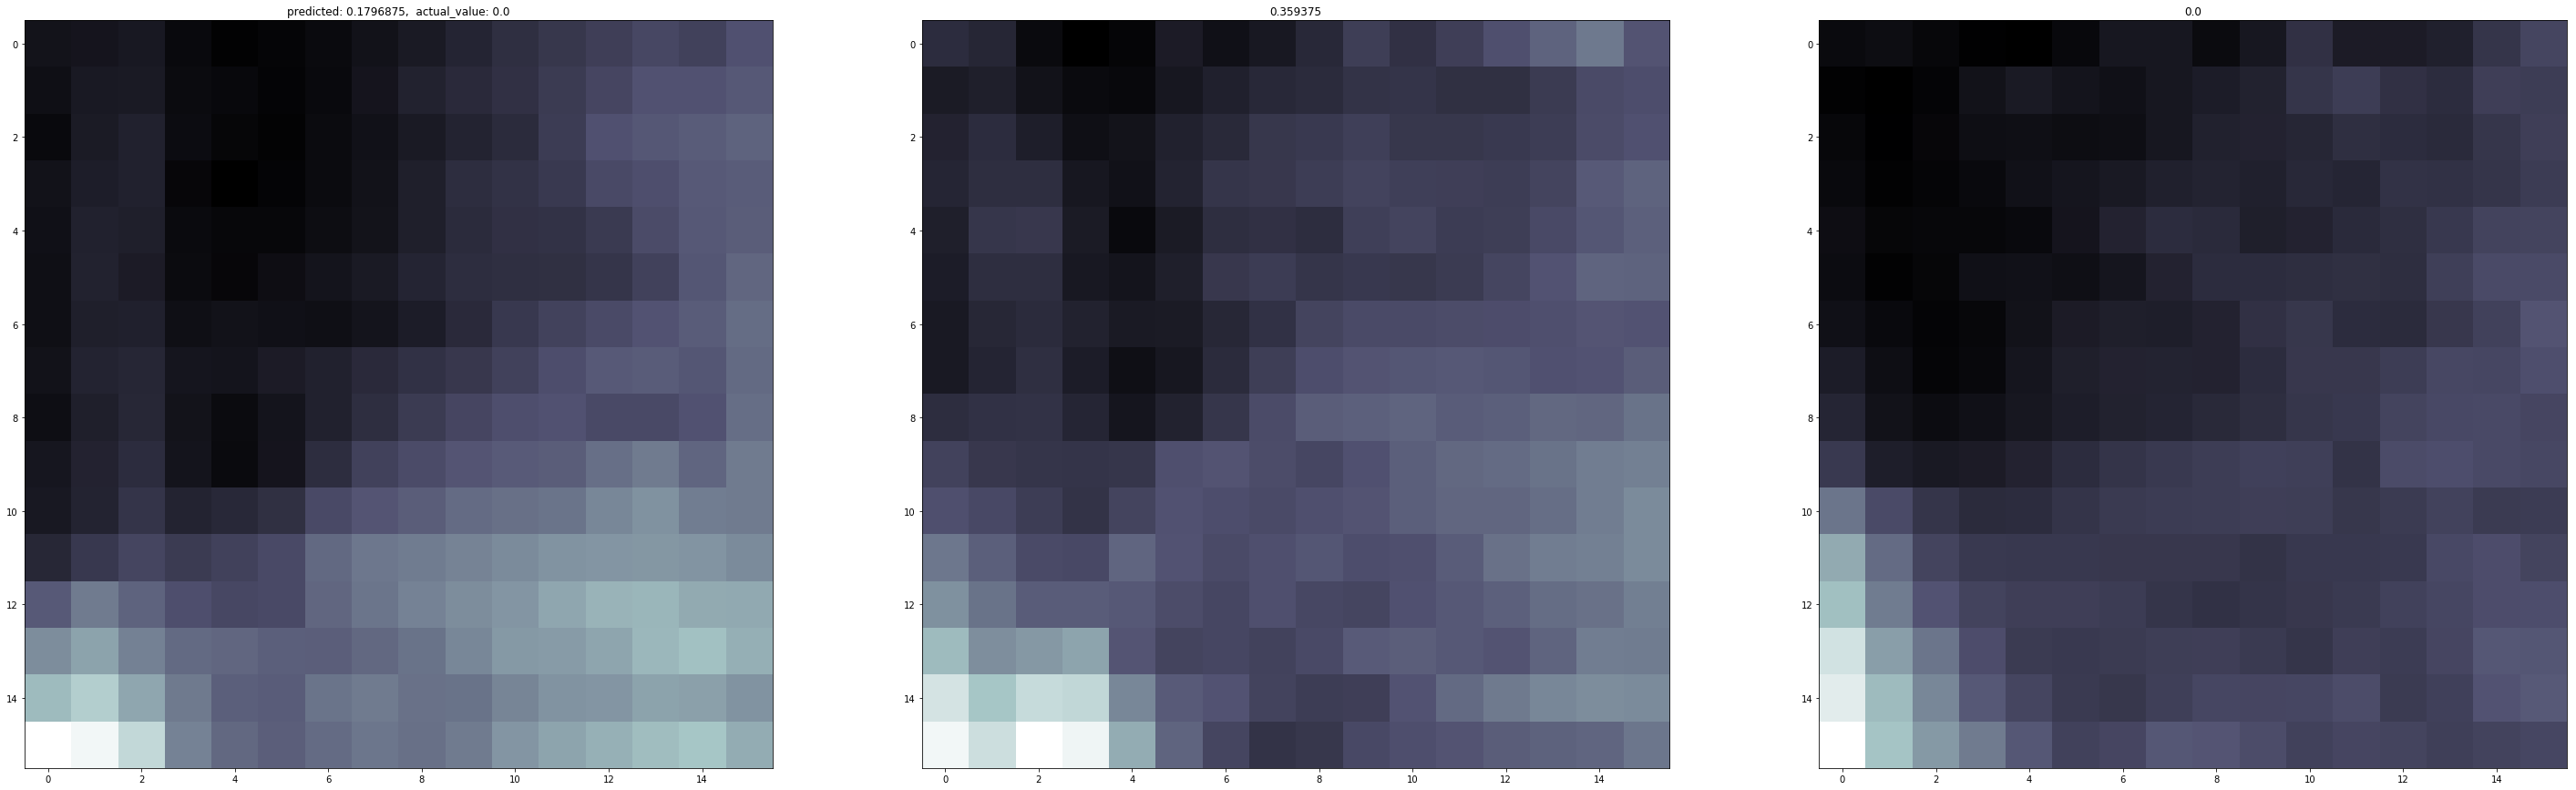

(array([  82,   83,   88,   94,  100,  106,  287,  293,  312,  318,  324,
        330,  464,  465,  492,  553,  554,  560,  721,  722,  728,  734,
        740,  746,  752,  940,  941,  944,  945,  946,  947,  956,  957,
        958,  959,  988,  994,  995, 1026, 1091, 1097, 1103, 1105, 1106,
       1107, 1108, 1109, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118,
       1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129,
       1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140,
       1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151,
       1156, 1157, 1188, 1265, 1271, 1277, 1283, 1289, 1295, 1296, 1297,
       1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308,
       1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319,
       1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330,
       1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341,
       1342, 1343, 1457, 1488, 1489, 1490, 1491, 1

In [13]:
test_predictions = knn1_model.predict(test_tile)

#print('Predicted Results', test_predictions)
#print(np.array(train_score)[np.where(np.array(train_score)>5)])
#print(knn1_model.kneighbors(np.array(test_tile),2))
#for i in range(10):
tt = knn1_model.kneighbors(np.array(test_tile),2,return_distance=False)
#plt.plot(tt)
#plt.show()
#print(np.shape(tt))
#plt.plot([1,2,3,4],[3,6,5,2],[1,3,5,6])
#plt.plot(knn1_model.kneighbors(np.array(test_tile),2),return_distance=False)
n1=train_tiles[tt[83][0]].reshape((16,16))
n2=train_tiles[tt[83][1]].reshape((16,16))
n1_score = train_score[tt[83][0]]
n2_score = train_score[tt[83][1]]
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(50,50))
ax1.imshow(test_tile[83].reshape((16,16)), cmap = 'bone')
ax1.set_title('predicted: ' + str((n1_score+n2_score)/2) + ',  actual_value: ' + str(test_score[83]))
ax2.imshow(n1, cmap = 'bone')
ax2.set_title(str(n1_score))
ax3.imshow(n2, cmap = 'bone')
ax3.set_title(str(n2_score))
plt.show()
 
aa=np.array(test_score) - np.array(test_predictions) !=0
print(np.where(aa))

    

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.array(test_score)>0, np.array(test_predictions)>0)

array([[1743,   32],
       [ 132,   13]])

(-0.1, 1.1)

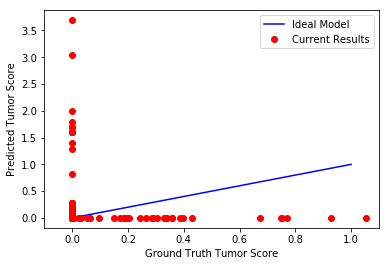

In [12]:
fig, ax1 = plt.subplots(1,1)
ax1.plot([0,1], [0,1], 'b-', label = 'Ideal Model')
ax1.plot(test_score, test_predictions, 'ro', label = 'Current Results')
ax1.set_xlabel('Ground Truth Tumor Score')
ax1.legend()
ax1.set_ylabel('Predicted Tumor Score')
ax1.set_xlim(-0.1,1.1)